# Elementos finitos linear 1D

## Montar a matrix de massa

In [148]:
ϕ₁(x, a, b)  = (b-x)/(b-a)
ϕ₂(x, a, b)  = (x-a)/(b-a)
mass_matrix(a, b) = [(b-a)/3 (b-a)/6; (b-a)/6 (b-a)/3]

mass_matrix (generic function with 1 method)

In [149]:
mass_matrix(0,1)

2x2 Array{Float64,2}:
 0.333333  0.166667
 0.166667  0.333333

In [193]:
a = -1.0
b = 1.0
xn = [linspace(a,b, 5);]
Ndof = size(xn,1);

In [194]:
Nel = size(xn,1)-1
dof_map = zeros(Int, 2, Nel)
for i = 1:Nel
    dof_map[1,i] = i
    dof_map[2,i] = i+1
end
dof_map

2x4 Array{Int64,2}:
 1  2  3  4
 2  3  4  5

In [195]:
M = zeros(Ndof, Ndof)

for e = 1:Nel
    Me = mass_matrix(xn[e], xn[e+1])
    for i = 1:2
        ig = dof_map[i,e]
        for k = 1:2
            kg = dof_map[k,e]
            M[kg,ig] += Me[k,i]
        end
    end
end
M
            

            

5x5 Array{Float64,2}:
 0.166667   0.0833333  0.0        0.0        0.0      
 0.0833333  0.333333   0.0833333  0.0        0.0      
 0.0        0.0833333  0.333333   0.0833333  0.0      
 0.0        0.0        0.0833333  0.333333   0.0833333
 0.0        0.0        0.0        0.0833333  0.166667 

## Montar o lado direito da equação:

In [196]:
fun(x) = sin(π*x)

fun (generic function with 1 method)

In [197]:
fe = fun(xn)

5-element Array{Float64,1}:
 -1.22465e-16
 -1.0        
  0.0        
  1.0        
  1.22465e-16

In [198]:
F = zeros(Ndof)
for e = 1:Nel
    Me = mass_matrix(xn[e], xn[e+1])
    Fe = Me * fun(xn[e:(e+1)])
    for i = 1:2
        ig = dof_map[i,e]
        F[ig] += Fe[i]
    end
end
        

# Calculando a integral de maneira mais exata:
using Jacobi
Q = 10
z = zgj(Q)
w = wgj(z)

F2 = zeros(Ndof)
for e = 1:Nel
    Fe1 = 0.0
    Fe2 = 0.0
    a1 = xn[e]
    b1 = xn[e+1]
    x = ( (1-z)*a1 + (1+z)*b1 ) / 2
    J = (b1-a1) / 2
    for q = 1:Q
        f = fun(x[q])
        Fe1 += J * w[q] * f * ϕ₁(x[q], a1, b1)
        Fe2 += J * w[q] * f * ϕ₂(x[q], a1, b1)
    end
    i1 = dof_map[1,e]
    i2 = dof_map[2,e]
    F2[i1] += Fe1
    F2[i2] += Fe2
end



## Solução do problema

In [199]:
u = M\F

5-element Array{Float64,1}:
 -8.32667e-17
 -1.0        
 -4.48359e-17
  1.0        
  9.61532e-17

In [200]:
hcat(F,F2)

5x2 Array{Float64,2}:
 -0.0833333  -0.115668   
 -0.333333   -0.405285   
  0.0        -1.38778e-17
  0.333333    0.405285   
  0.0833333   0.115668   

In [201]:
u2 = M\F2

5-element Array{Float64,1}:
 -0.0983749  
 -1.19126    
  8.96719e-17
  1.19126    
  0.0983749  

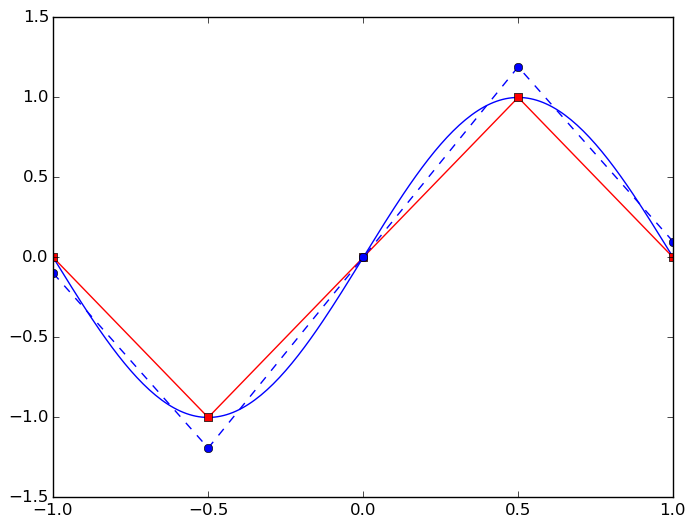

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f87d47b5bd0>

In [202]:
using PyPlot
xx = linspace(a, b, 201)
plot(xx, fun(xx))
plot(xn, u, "rs-")
plot(xn, u2, "bo--")

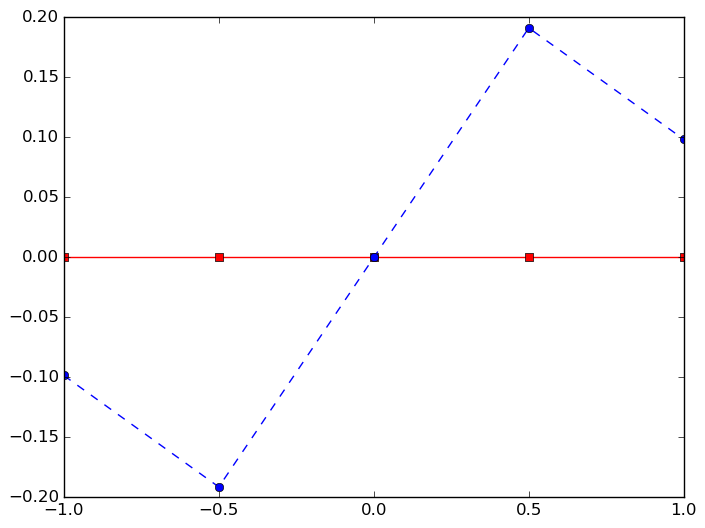

2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f87d46eb4d0>
 PyObject <matplotlib.lines.Line2D object at 0x7f87d46eb710>

In [203]:
e1 = u - fe
e2 = u2 - fe

plot(xn, e1, "rs-", xn, e2, "bo--")